In [1]:
import pandas as pd

In [2]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_category_name = pd.read_csv('product_category_name_translation.csv')

df_train = df_orders.merge(df_order_items, on='order_id', how='left')
df_train = df_train.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')
df_train = df_train.merge(df_product_category_name, on='product_category_name', how='inner')

In [4]:
df_reviews_filled = df_order_reviews.dropna()
df_reviews_filled.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

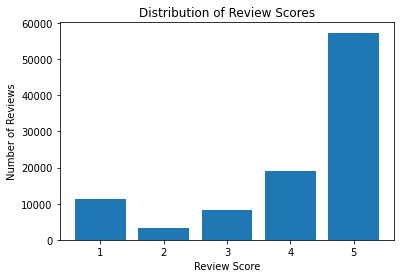

In [5]:
import matplotlib.pyplot as plt

review_scores_counts = df_order_reviews['review_score'].value_counts().sort_index()
plt.bar(review_scores_counts.index, review_scores_counts.values)
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Scores')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /home/nbgrader/fall22/student-
[nltk_data]     accounts/fbagbulo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nbgrader/fall22/student-
[nltk_data]     accounts/fbagbulo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-08a5b46c736f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filled['tokenized_text'] = df_reviews_filled['review_comment_message'].apply(tokenize_text)
<ipython-input-7-08a5b46c736f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

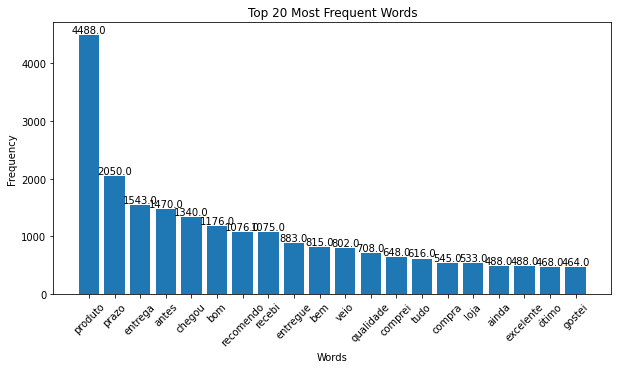

In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text, language='portuguese')
    return tokens

# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('portuguese'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Tokenize and remove stopwords for each review
df_reviews_filled['tokenized_text'] = df_reviews_filled['review_comment_message'].apply(tokenize_text)
df_reviews_filled['cleaned_text'] = df_reviews_filled['tokenized_text'].apply(remove_stopwords)

# Convert cleaned text back to strings
df_reviews_filled['cleaned_text'] = df_reviews_filled['cleaned_text'].apply(lambda x: ' '.join(x))

def plot_word_frequency(text):
    count_vectorizer = CountVectorizer()
    count_data = count_vectorizer.fit_transform(text)
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in text:
        total_counts += np.array(count_vectorizer.transform([t]).toarray()[0])
    
    word_freq = pd.DataFrame({'word': words, 'frequency': total_counts})
    word_freq = word_freq.sort_values(by='frequency', ascending=False)
    plt.figure(figsize=(10,5))
    bars = plt.bar(word_freq['word'][:20], word_freq['frequency'][:20])
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Frequent Words')
    
    # Add text above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()

    # Create a separate dataframe for top 20 frequent words
    top_20 = word_freq.head(20)[['word']].reset_index(drop=True).rename(columns={'word': 'top_20'})
    return top_20

# Plot word frequency for cleaned text and get top 20 words
top_20_words = plot_word_frequency(df_reviews_filled['cleaned_text'])

In [13]:
top_20_words

,top_20
0,produto
1,prazo
2,entrega
3,antes
4,chegou
5,bom
6,recomendo
7,recebi
8,entregue
9,bem


In [10]:
from googletrans import Translator

# Print the top 20 words dataframe
top_20_words.rename(columns={'top_20': 'Portuguese'}, inplace=True)

# Function to translate Portuguese to English
def translate_to_english(text):
    translator = Translator()
    translation = translator.translate(text, src='pt', dest='en')
    return translation.text

# Apply translation to the 'Portuguese' column
top_20_words['English'] = top_20_words['Portuguese'].apply(translate_to_english)

top_20_words

,Portuguese,English
0,produto,product
1,prazo,term
2,entrega,delivery
3,antes,before
4,chegou,it arrived
5,bom,good
6,recomendo,I recommend
7,recebi,I received
8,entregue,delivered
9,bem,good


In [9]:
top_20_words['English']

0         product
1            term
2        delivery
3          before
4      it arrived
5            good
6     I recommend
7      I received
8       delivered
9            good
10        he came
11        quality
12       I bought
13            all
14       purchase
15          store
16            yet
17          great
18      excellent
19        I liked
Name: English, dtype: object